In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [16]:
import os

folder_path = os.path.abspath('bin_detection')
model_path = os.path.join(folder_path, 'bin_detection')

In [5]:
import sys

sys.path.append(model_path)

In [6]:
for path in sys.path:
    print(path)

/home/wf1497c/ML/UCSD/ECE-276A/Project-1
/home/wf1497c/.vscode-server/extensions/ms-toolsai.jupyter-2021.11.1001550889/pythonFiles
/home/wf1497c/.vscode-server/extensions/ms-toolsai.jupyter-2021.11.1001550889/pythonFiles/lib/python
/usr/lib/python38.zip
/usr/lib/python3.8
/usr/lib/python3.8/lib-dynload

/home/wf1497c/.virtualenvs/MLenv/lib/python3.8/site-packages
/home/wf1497c/.virtualenvs/MLenv/lib/python3.8/site-packages/IPython/extensions
/home/wf1497c/.ipython
/home/wf1497c/ML/UCSD/ECE-276A/Project-1
/home/wf1497c/ML/UCSD/ECE-276A/Project-1/bin_detection


In [11]:
from gaussianClassifier import GaussianClassifierParameters

g

gaussianClassifier.GaussianClassifierParameters

(-0.5, 639.5, 479.5, -0.5)

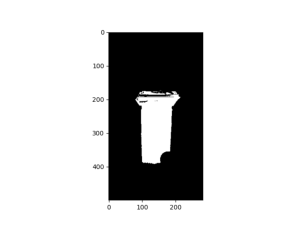

In [23]:
mask = cv2.imread('mask.png', cv2.IMREAD_GRAYSCALE)
f, ax = plt.subplots()
ax.imshow(mask, cmap = 'gray')
ax.axis('off')

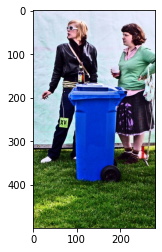

In [24]:
img = cv2.imread('bin_detection/data/training/0001.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [31]:
x_max, y_max = mask.shape[0], mask.shape[1]	

kernel = np.ones((13,13), np.uint8)
erode = cv2.erode(mask, kernel, iterations = 1)
dilation = cv2.dilate(erode, kernel[:5,:5], iterations = 3)
blurred = cv2.GaussianBlur(dilation, (3,3),0)
ret, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

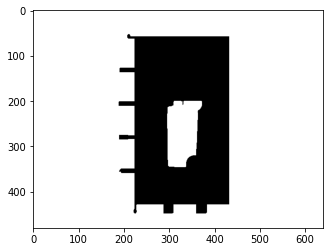

In [32]:
plt.imshow(thresh, cmap = 'gray')

In [33]:
boxes = []
similarity = []
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [12]:
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    area_ratio = cv2.contourArea(cnt)/(y_max*x_max)
    similarity1 = 100 - np.absolute((h/w)-1.5)*100
    # print(f"h/w : {h/w}")
    # print(f"area ratio : {area_ratio}")
    # print(f"bbox {x,y,x+w,y+h}")
    if 0.7 <= h/w <=2 and area_ratio > 0.02:
        similarity1 = 100 - np.absolute((h/w)-1.5)*100
        
        boxes.append([x,y,x + w,y + h])
        
        similarity.append(similarity1)

boxes.sort()

In [13]:
a = contours[0]

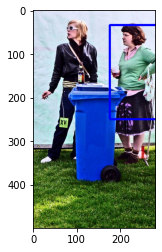

In [15]:
cv2.drawContours(img,contours,-1,(0,0,255),3)
plt.imshow(img)

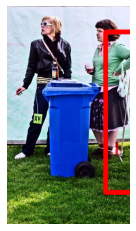

In [36]:
for box in boxes: 
    x1,y1,x2,y2 = box[0],box[1],box[2],box[3]
    cv2.rectangle(img, (x1,y1), (x2, y2), (255,0,0), 10)
    fig,ax =  plt.subplots(figsize = (8,6))
    ax.imshow(img)
    ax.axis('off')
    plt.savefig('boxes')

In [34]:
img.shape

(500, 281, 3)

In [33]:
boxes

[[225, 59, 432, 427]]